# Image Recognition

![](./img/classification.png)

# Bounding Box Regression

![](./img/bbreg.png)

# Segmentation

![](./img/seg1.png)

<img src="img/sat_to_map.png" style="height: 200px;"/>

# Semantic Segmentation

![](./img/seg2.png)

# Convolution


<tr>
<td> <img src="img/depthcol.jpeg" style="height: 200px;"/> </td>
<td> <img src="img/kernel_convolution.jpg" style="height: 350px;"/> </td>
</tr>


**Spatial arrangement**. Three hyperparameters control the size of the output volume: the depth, stride and zero-padding:
1. First, the **depth** of the output volume is a hyperparameter: it corresponds to the number of **filters** we would like to use, each learning to look for something different in the input. For example, if the first Convolutional Layer takes as input the raw image, then different neurons along the depth dimension may activate in presence of various oriented edges, or blobs of color. We will refer to a set of neurons that are all looking at the same region of the input as a depth column (some people also prefer the term fibre).
2. Second, we must specify the **stride** with which we slide the filter. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2 then the filters jump 2 pixels at a time as we slide them around. This will produce smaller output volumes spatially.
3. As we will soon see, sometimes it will be convenient to pad the input volume with zeros around the border. The size of this **zero-padding** is a hyperparameter. The nice feature of zero padding is that it will allow us to control the spatial size of the output volumes (most commonly as we’ll see soon we will use it to exactly preserve the spatial size of the input volume so the input and output width and height are the same).


#### Convolutional layer
* Accepts a volume of size $W_1 \times H_1 \times D_1$
* Requires four hyperparameters:
    * Number of filters $K$,
    * their spatial extent $F$,
    * the stride $S$,
    * the amount of zero padding $P$.
* Produces a volume of size $W_2 \times H_2 \times D_2$ where:
    * $W_2=(W_1-F+2P)/S+1$
    * $H_2=(H_1-F+2P)/S+1$ (i.e. width and height are computed equally by symmetry)
    * $D_2=K$
* We have $F \cdot F \cdot D_1$ weights per filter, for a total of $(F \cdot F \cdot D_1)\cdot K$ weights and $K$ biases.
* In the output volume, the d-th depth slice (of size $W_2 \cdot H_2$) is the result of performing a valid convolution of the d-th filter over the input volume with a stride of $S$, and then offset by d-th bias.
<br>

A common setting of the hyperparameters is $F=3,S=1,P=1$

Below is a running demo of a CONV layer. Since 3D volumes are hard to visualize, all the volumes (the input volume (in blue), the weight volumes (in red), the output volume (in green)) are visualized with each depth slice stacked in rows. The input volume is of size $W_1=5,H_1=5,D_1=3$, and the CONV layer parameters are $K=2,F=3,S=2,P=1$. That is, we have two filters of size $3 \times 3$, and they are applied with a stride of $2$. Therefore, the output volume size has spatial size $(5 - 3 + 2)/2 + 1 = 3$. Moreover, notice that a padding of $P=1$ is applied to the input volume, making the outer border of the input volume zero. The visualization below iterates over the output activations (green), and shows that each element is computed by elementwise multiplying the highlighted input (blue) with the filter (red), summing it up, and then offsetting the result by the bias.

![](img/convolution.gif)

### Filters on action

![](./img/1_Y0tvNnH7sXHw2zP7TrCKgA.gif)

Connvolution kernel examples: <br/>
http://aishack.in/tutorials/image-convolution-examples/

#### https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Learned filters
![](./img/weights.jpeg)

![](./img/feature_maps.png)

* Input volume size: $W$ 
* Filter/kernel size: $F$ 
* Stride: $S$
* Zero padding on the border: $P$ 

**spatial size of the output volume:** $(W - F + 2P)/S + 1$.

![](./img/stride.jpeg)

**Note that** hyperparameters have mutual constraints: spatial size of the output volume must be an integer

## Upscale

![](./img/upscale.png)

### Pooling Layer
It is common to periodically insert a Pooling layer in-between successive Conv layers. Its function is to reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially, using the MAX/AVERAGE operation. The most common form is a pooling layer with filters of size $2 \times 2$ applied with a stride of $2$ downsamples every depth slice in the input by $2$ along both width and height, discarding $75%$ of the activations. Every MAX operation would in this case be taking a max over 4 numbers (little 2x2 region in some depth slice). The depth dimension remains unchanged. More generally, the pooling layer:

* Accepts a volume of size $W_1 \times H_1 \times D_1$
* Requires two hyperparameters:
    * their spatial extent $F$,
    * the stride $S$,
* Produces a volume of size $W_2 \times H_2 \times D_2$ where:
    * $W_2=(W_1-F)/S+1$
    * $H_2=(H_1-F)/S+1$
    * $D_2=D_1$
* Introduces zero parameters since it computes a fixed function of the input
* Note that it is not common to use zero-padding for Pooling layers
<br>
There are only two commonly seen variations of the max pooling layer found in practice: A pooling layer with $F=3,S=2$ (also called overlapping pooling), and more commonly $F=2,S=2$. Pooling sizes with larger receptive fields are too destructive.

![maxpool](img/maxpool.jpeg)

# Deconvolution
##### more: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
![](./img/deconv.gif)

#### understanding deconvolution: https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0

# For Classification Tasks, Feature Extractor + Fully Connected layers

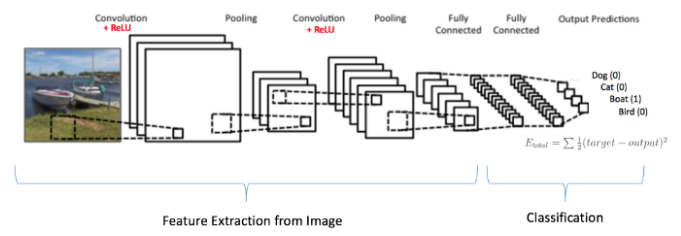

# For Segmentation, Fully Convolutional

![](./img/segnet.png)